# Business analýza

## Importy a načtení skladu

In [2]:
import os
import pandas
import random
import re

__file__ = __vsc_ipynb_file__  
SCRIPT_FOLDER = os.path.dirname(__file__)
PROJECT_FOLDER = os.path.dirname(SCRIPT_FOLDER)
DATA_FOLDER = os.path.join(PROJECT_FOLDER,'data')

COL_ID = 'pid'
COL_MODEL = 'Model'
COL_BEZDPH = 'bez_dph'
COL_SDPH = 's_dph'
COL_PRODUKT = 'Produkt'
COL_NAKUP = 'cena_nakup'
COL_SKLADEM = 'skladem'
COL_PRODANO = 'prodano'
COL_SKUPINA = 'skupina'
COL_HODNOTA = 'hodnota_na_sklade'
COL_VYNOS = 'vynos'
COL_ZISK = 'zisk'
COL_MARZE = 'marze'


## Načtení ceníků
### Kosmetika

In [3]:
file_kosm = r'C:\Users\Nikolay\Desktop\DATOVA ANALITIKA\working\data\source\sklad\cenik_kosmetiky.csv'

kosm_cfg = dict(
    #nrows=10
    thousands=' ',
    usecols= [0,1,2,3],
    skiprows= 1,
    header= None,
    names= [COL_ID,COL_MODEL,COL_BEZDPH,COL_SDPH],
    index_col=[0],
    )

kosmetika= pandas.read_csv(file_kosm,**kosm_cfg)
kosmetika.info()
kosmetika

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 19106 to 16090
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    689 non-null    object 
 1   bez_dph  689 non-null    float64
 2   s_dph    689 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.5+ KB


,Model,bez_dph,s_dph
pid,,,
19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0
1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0
19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0
1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0
19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0
...,...,...,...
5014,LÁHEV 1 l - plast,17.36,21.0
KD090006,"TATSOI TANGA, PSP – DÁREK - 6 g",24.35,28.0
KD020005,"ŘEPA SANGRIA BÝČÍ KREV, PSP – DÁREK - 5 g",24.35,28.0


### Mobily

In [4]:
file_mobily = r'C:\Users\Nikolay\Desktop\DATOVA ANALITIKA\working\data\source\sklad\cenik_mobilnich_telefonu.csv'

mb_cfg = {
    #'nrows': 10,
    'usecols': [0,7,8],
    'skiprows': 1,
    'header': None,
    'names': [COL_MODEL,COL_BEZDPH,COL_SDPH],
    #'skipfooter': 10
}

mobily = pandas.read_csv(file_mobily,**mb_cfg)

mobily.info()
mobily

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    118 non-null    object 
 1   bez_dph  118 non-null    float64
 2   s_dph    118 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


,Model,bez_dph,s_dph
0,TCL TAB 10 4G Dark Gray,3534.71,4277
1,Alcatel 1 2021 Volcano Black,1303.31,1577
2,Alcatel 2019G Metallic Gray,724.79,877
3,Alcatel 1068 Black,394.21,477
4,Apple iPhone 14 Pro Max 1 TB Space Black,44195.87,53477
...,...,...,...
113,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001
114,Microsoft XBOX Series S + ovladač,7934.71,9601
115,Yealink SIP-W73P,2460.33,2977
116,Yealink SIP-T43U,2212.40,2677


In [5]:
kosmetika.reset_index(inplace=True)
kosmetika

,pid,Model,bez_dph,s_dph
0,19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0
1,1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0
2,19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0
3,1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0
4,19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0
...,...,...,...,...
684,5014,LÁHEV 1 l - plast,17.36,21.0
685,KD090006,"TATSOI TANGA, PSP – DÁREK - 6 g",24.35,28.0
686,KD020005,"ŘEPA SANGRIA BÝČÍ KREV, PSP – DÁREK - 5 g",24.35,28.0
687,D13502,MANDARINKA ČERVENÁ - DÁREK - 5 ml,78.51,95.0


### Vygenerování `COL_ID` pro mobily

In [6]:
#hash('neco neco')
def get_id(data):
    #print(data)
    return hash(data[COL_MODEL])

mobily[COL_ID] = mobily.apply(get_id,axis=1)
mobily

,Model,bez_dph,s_dph,pid
0,TCL TAB 10 4G Dark Gray,3534.71,4277,1780035341750736864
1,Alcatel 1 2021 Volcano Black,1303.31,1577,3593949325940623963
2,Alcatel 2019G Metallic Gray,724.79,877,-5640865101445359386
3,Alcatel 1068 Black,394.21,477,-9064947116669012122
4,Apple iPhone 14 Pro Max 1 TB Space Black,44195.87,53477,-5476412866221381409
...,...,...,...,...
113,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001,-4292256063647470713
114,Microsoft XBOX Series S + ovladač,7934.71,9601,5351397075875474241
115,Yealink SIP-W73P,2460.33,2977,-2679449970562026510
116,Yealink SIP-T43U,2212.40,2677,2854992111268423981


### spojíme vše do jednoho
1. přidáme si označení "původu" dat

In [7]:
kosmetika[COL_SKUPINA] = 'kosmetika'
mobily[COL_SKUPINA] = 'mobily'

2. spojíme obě datové sady do jednoho `DataFame` 

In [8]:
sklad = pandas.concat([kosmetika,mobily]).set_index(COL_ID)

In [9]:
sklad

,Model,bez_dph,s_dph,skupina
pid,,,,
19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0,kosmetika
1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0,kosmetika
19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0,kosmetika
1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0,kosmetika
19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0,kosmetika
...,...,...,...,...
-4292256063647470713,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001.0,mobily
5351397075875474241,Microsoft XBOX Series S + ovladač,7934.71,9601.0,mobily
-2679449970562026510,Yealink SIP-W73P,2460.33,2977.0,mobily


### Doplníme si do skladu další hodnoty

In [10]:
def build_product(text):
    output = text[0:10]
    rem = re.search(r'\b(olej|mast|gel|kr[eÉ]em|balz[aá]m)\b',text,flags= re.IGNORECASE)
    if rem:
        output = rem.group(1)
    else:
        rem = re.search(r'\d{1,5}\s*[mcd]l\b',text,flags= re.IGNORECASE)
        if rem:
            output='esence'
        else:
            rem = re.search(r'\d{1,5}\s*[mdk]?g\b',text)
            if rem:
                output='prasek'
            else:
                rem = re.search(r'^(\w+)[\W\b]*(\w+)?',text)
                if rem:
                    output = f'{rem.group(1)} {rem.group(2)}'
    return output.lower()

def init_store(data):
    nakup = data[COL_BEZDPH] * random.choice((0.75,.8,.85,.92))
    skladem = random.randint(0,100)
    prodano = random.randint(20,100)
    produkt = build_product(data[COL_MODEL])
    return [nakup,skladem,prodano,produkt]

In [11]:
sklad[[COL_NAKUP,COL_SKLADEM,COL_PRODANO,COL_PRODUKT]] = sklad.apply(init_store,axis=1,result_type='expand')
sklad

,Model,bez_dph,s_dph,skupina,cena_nakup,skladem,prodano,Produkt
pid,,,,,,,,
19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0,kosmetika,236.0365,51,25,olej
1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0,kosmetika,55.4965,89,40,olej
19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0,kosmetika,146.1150,71,92,olej
1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0,kosmetika,33.0140,13,100,olej
19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0,kosmetika,153.5848,46,70,olej
...,...,...,...,...,...,...,...,...
-4292256063647470713,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001.0,mobily,11240.3280,10,68,sony playstation
5351397075875474241,Microsoft XBOX Series S + ovladač,7934.71,9601.0,mobily,6744.5035,12,46,microsoft xbox
-2679449970562026510,Yealink SIP-W73P,2460.33,2977.0,mobily,1845.2475,92,25,yealink sip


In [12]:
#sklad.to_csv(os.path.join(DATA_FOLDER,'working','sklad.csv'))
#sklad[sklad[COL_PRODUKT] == 'prasek']
sklad[COL_PRODUKT].value_counts().head(20)

Produkt
esence              432
olej                122
prasek               49
apple iphone         21
samsung galaxy       20
balzám               13
apple ipad            8
xiaomi redmi          6
aroma flakon          6
gel                   5
dárkový poukaz        5
plakát eoné           5
suché ubrousky        4
apple airpods         4
ředící lahvička       3
yealink sip           3
vodafone edohled      3
mast                  3
zubní kartáček        3
lotos směs            2
Name: count, dtype: int64

## Agregace dat
### Jednoduchá

In [13]:
sklad.groupby(COL_PRODUKT).count().sort_values(COL_MODEL,ascending=False).head(20)#[COL_MODEL]

,Model,bez_dph,s_dph,skupina,cena_nakup,skladem,prodano
Produkt,,,,,,,
esence,432,432,432,432,432,432,432
olej,122,122,122,122,122,122,122
prasek,49,49,49,49,49,49,49
apple iphone,21,21,21,21,21,21,21
samsung galaxy,20,20,20,20,20,20,20
balzám,13,13,13,13,13,13,13
apple ipad,8,8,8,8,8,8,8
xiaomi redmi,6,6,6,6,6,6,6
aroma flakon,6,6,6,6,6,6,6


### S různými funkcemi

In [14]:
sklad.groupby(COL_PRODUKT).aggregate({
    COL_MODEL: 'count',
    COL_SKLADEM: 'sum',
    COL_PRODANO: 'sum',
    COL_NAKUP: ['min','mean','max'],
    COL_BEZDPH: ['min','mean','max'],
}).sort_values((COL_MODEL,'count'),ascending=False).head(20)

Model skladem prodano  cena_nakup                            \
                 count     sum     sum         min          mean         max   
Produkt                                                                        
esence             432   21768   25626      5.5800    340.004857   5212.3955   
olej               122    6276    7432     26.0325    294.026232   4048.0000   
prasek              49    2490    2897     18.0880    111.331592    371.5680   
apple iphone        21    1253    1240   6803.9250  21038.533995  35718.0524   
samsung galaxy      20     880    1242   2737.9476   9294.690110  29737.8075   
balzám              13     742     743     42.8485    211.433792    649.5900   
apple ipad           8     531     588  10169.7910  19665.292262  32676.7256   
xiaomi redmi         6     174     406   1845.2475   4012.353967   6042.0210   
aroma flakon         6     249     278     81.9840    152.106867    206.4075   
plakát eoné          5     283     322     24.0000     25.620000     27.6000   
gel                  5     199     300     46.2800    152.105440    203.0072   
dárkový poukaz       5     266     289    309.9150    647.934400    991.7360   
suché ubrousky       4     135     185     33.7200     41.087725     52.4584   
apple airpods        4     204     249   3290.5760   3986.300875   4811.2400   
zubní kartáček       3     121     208     48.9675     52.232000     55.4965   
mast                 3      78     225     84.4008    240.144667    425.7852   
ředící lahvička      3     167     121     23.5704     25.583300     27.3955   
vodafone edohled     3     111     180   1860.1275   2745.759000   3694.8375   
yealink sip          3     176     187   1199.0452   1567.864233   1845.2475   
huawei wttx          2     135     144   4099.1760   4406.614200   4714.0524   

                   bez_dph                          
                       min          mean       max  
Produkt                                             
esence                7.44    418.538426   6334.71  
olej                 34.71    349.949754   4400.00  
prasek               22.61    132.941224    464.46  
apple iphone       9071.90  25739.511905  44195.87  
samsung galaxy     2976.03  11786.281000  39650.41  
balzám               50.41    271.265385    866.12  
apple ipad        11964.46  24102.891250  40476.86  
xiaomi redmi       2460.33   4668.595000   7108.26  
aroma flakon        102.48    178.101667    275.21  
plakát eoné          30.00     30.000000     30.00  
gel                  57.85    185.950000    228.10  
dárkový poukaz      413.22    809.918000   1239.67  
suché ubrousky       40.50     48.555000     57.02  
apple airpods      4113.22   5146.280000   6014.05  
zubní kartáček       65.29     65.290000     65.29  
mast                 91.74    272.453333    462.81  
ředící lahvička      25.62     30.026667     32.23  
vodafone edohled   2480.17   3586.503333   4926.45  
yealink sip        1303.31   1992.013333   2460.33  
huawei wttx        5123.97   5123.970000   5123.97

### Příklad
počet položek produktu; TOP15

In [15]:
sklad[[COL_PRODUKT,COL_MODEL]].groupby(COL_PRODUKT).count().sort_values(COL_MODEL,ascending=False).head(20)

,Model
Produkt,
esence,432
olej,122
prasek,49
apple iphone,21
samsung galaxy,20
balzám,13
apple ipad,8
xiaomi redmi,6
aroma flakon,6


## Team challenge: Najdi 
1. Hodnotu skladu, množství na skladě, prodeje, vynos a zisk podle produktových skupin
2. Počet produktů skladem
1. Množství prodaných produktů
1. Hodnotu produktů na skladě
1. TOP10 produktů podle výnosu
1. 10 nejméně a nejvíce ziskových produktů (v jedné tabulce)
1. Výnos z TOP10 proti celkovému výnosu (hodnoty i procentuální poměr)

### Poznámky
- "produkt" je sloupec, který jsme vytvořili z popisu `COL_PRODUKT`
- "produktů" znamená, že výstup bude podle produktu
- pracuj s cenami bez DPH


## Řešení

### Počítané KPI hodnoty
- `hodnota na skladě` = `nákupní cena` * `množství skladem`
- `výnos` = `prodejní cena` * `počet prodaných ks`
- `zisk` = (`prodejní cena` - `nákupní cena`) * `počet prodaných ks`
- `marže` = `zisk` / `výnos` * 100

In [16]:
# používej předdefinované konstanty

*1*. Hodnotu skladu, množství na skladě, prodeje, vynos a zisk podle produktových skupin
-----------------------------------

In [17]:
def init_store(data):
    skladem = random.randint(0,100)
    nakup = data[COL_BEZDPH] * random.choice((0.75,.8,.85,.92))
    hodnota_na_sklade = data[COL_BEZDPH] * data[COL_SKLADEM]
    prodano = random.randint(20,100)
    vynos = data[COL_SDPH] * data[COL_PRODANO]
    produkt = build_product(data[COL_MODEL])
    zisk = (data[COL_BEZDPH] - nakup)*prodano
    marze = (zisk/vynos)*100
    return [hodnota_na_sklade,skladem,prodano,vynos,produkt,zisk,marze]

In [18]:
sklad[[COL_HODNOTA,COL_SKLADEM,COL_PRODANO,COL_VYNOS,COL_PRODUKT,COL_ZISK,COL_MARZE]] = sklad.apply(init_store,axis=1,result_type='expand')
#sklad = sklad.groupby(COL_SKUPINA)[[COL_SKLADEM,COL_PRODANO,COL_HODNOTA,COL_VYNOS,COL_ZISK]]
sklad

,Model,bez_dph,s_dph,skupina,cena_nakup,skladem,prodano,Produkt,hodnota_na_sklade,vynos,zisk,marze
pid,,,,,,,,,,,,
19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0,kosmetika,236.0365,87,49,olej,14162.19,8400.0,1088.5448,12.958867
1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0,kosmetika,55.4965,23,44,olej,5810.81,3160.0,718.1900,22.727532
19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0,kosmetika,146.1150,80,91,olej,12204.90,19136.0,3128.5800,16.349185
1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0,kosmetika,33.0140,10,49,olej,504.92,4700.0,285.4740,6.073915
19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0,kosmetika,153.5848,90,69,olej,7679.24,14140.0,2303.7720,16.292588
...,...,...,...,...,...,...,...,...,...,...,...,...
-4292256063647470713,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001.0,mobily,11240.3280,86,100,sony playstation,140504.10,1156068.0,112403.2800,9.722895
5351397075875474241,Microsoft XBOX Series S + ovladač,7934.71,9601.0,mobily,6744.5035,85,31,microsoft xbox,95216.52,441646.0,61494.0025,13.923822
-2679449970562026510,Yealink SIP-W73P,2460.33,2977.0,mobily,1845.2475,60,80,yealink sip,226350.36,74425.0,29523.9600,39.669412


In [19]:
skupiny = sklad[[COL_SKUPINA,COL_SKLADEM,COL_HODNOTA,COL_PRODANO,COL_VYNOS,COL_ZISK]].groupby(COL_SKUPINA).sum()
skupiny

,skladem,hodnota_na_sklade,prodano,vynos,zisk
skupina,,,,,
kosmetika,34847,12224822.13,40296,1.749616e+07,2.421782e+06
mobily,6216,75804843.83,7101,1.047305e+08,1.311064e+07


array([[<Axes: ylabel='skladem'>, <Axes: ylabel='hodnota_na_sklade'>],
       [<Axes: ylabel='prodano'>, <Axes: ylabel='vynos'>],
       [<Axes: ylabel='zisk'>, <Axes: >]], dtype=object)

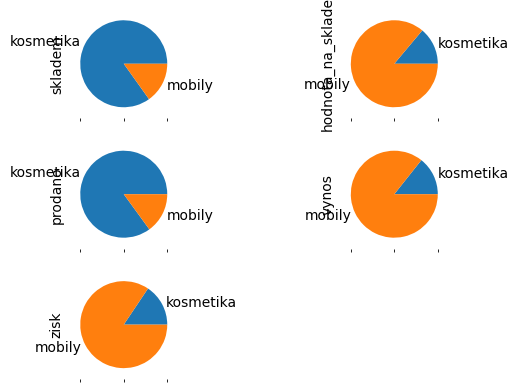

In [20]:
skupiny.plot.pie(subplots=True,legend=False,layout=(3,2))

*2*. Počet produktů skladem   
*3*. Množství prodaných produktů  
*4*. Hodnotu produktů na skladě
-----------------------------------------------

In [21]:

#sklad[[COL_SKLADEM,COL_PRODANO,COL_HODNOTA]].groupby(COL_PRODUKT).count().sort_values(COL_MODEL,ascending=False).head(20)

#sklad.groupby(COL_PRODUKT).aggregate({
    #COL_SKLADEM: 'sum',
    #COL_PRODANO: 'sum',
    #COL_HODNOTA: 'sum',
#})#.sort_values((COL_MODEL,'count'),ascending=False).head(20)

produkty = sklad[[COL_PRODUKT,COL_SKLADEM,COL_HODNOTA,COL_PRODANO,COL_VYNOS,COL_ZISK]].groupby(COL_PRODUKT).sum()
produkty

,skladem,hodnota_na_sklade,prodano,vynos,zisk
Produkt,,,,,
alcatel 1,87,75591.98,55,97774.0,1.792051e+04
alcatel 1068,0,29959.96,50,32436.0,3.942100e+03
alcatel 2019g,59,50010.51,56,71914.0,3.247059e+03
apple airpods,227,1105047.82,340,1643773.0,2.381622e+05
apple ipad,322,13726682.87,577,17365476.0,2.938016e+06
...,...,...,...,...,...
zte mf255v,73,213911.74,124,362706.0,3.312228e+04
zubní kartáček,170,7900.09,148,16432.0,1.916914e+03
zyxel vmg8623,6,23801.70,21,159360.0,6.664476e+03


<Axes: ylabel='Produkt'>

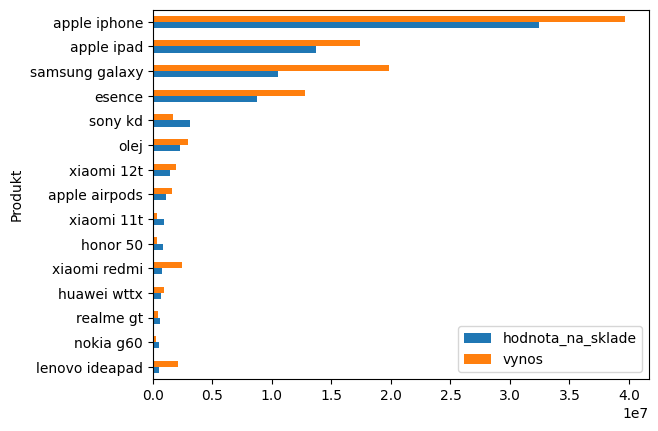

In [22]:
produkty[[COL_HODNOTA,COL_VYNOS]].sort_values(COL_HODNOTA).tail(15).plot.barh()

*5*. TOP10 produktů podle výnosu
-------------------------------------------

In [23]:
#sklad[[COL_PRODUKT,COL_VYNOS]].groupby(COL_PRODUKT).sum().sort_values(COL_PRODUKT,ascending=False).head(10)

top10_vynos = sklad[[COL_PRODUKT, COL_VYNOS]].groupby(COL_PRODUKT).sum().sort_values(COL_VYNOS,ascending=False).head(10)
top10_vynos

,vynos
Produkt,
apple iphone,39686988.00
samsung galaxy,19822846.00
apple ipad,17365476.00
esence,12760559.88
olej,2951732.31
xiaomi redmi,2436802.00
lenovo ideapad,2145927.00
xiaomi 12t,1954932.00
sony kd,1728279.00


*6*. 10 nejméně a nejvíce ziskových produktů (v jedné tabulce)
---------------------------------------

In [24]:
top10_zisk = sklad[[COL_PRODUKT, COL_ZISK]].groupby(COL_PRODUKT).sum().sort_values(COL_ZISK,ascending=False).head(10)
tail10_zisk = sklad[[COL_PRODUKT, COL_ZISK]].groupby(COL_PRODUKT).sum().sort_values(COL_ZISK,ascending=False).tail(10)

pandas.concat([top10_zisk,tail10_zisk])

,zisk
Produkt,
apple iphone,4.096979e+06
apple ipad,2.938016e+06
samsung galaxy,1.947213e+06
esence,1.744891e+06
sony kd,4.900615e+05
olej,4.369905e+05
xiaomi redmi,2.634718e+05
apple airpods,2.381622e+05
lenovo ideapad,2.189980e+05


*7*. Výnos z TOP10 proti celkovému výnosu (hodnoty i procentuální poměr)
--------------------------------

In [28]:
income_all = sklad[COL_VYNOS].sum()
income_top10 = top10_vynos[COL_VYNOS].sum()

print(f'Vynos skladu {income_all}, vynos TOP10 {income_top10}, pomer: {income_top10/income_all}') 

Vynos skladu 122226675.79, vynos TOP10 102497315.19, pomer: 0.8385838404547842


<Axes: title={'center': 'vynos TOP10 vs. ostatni'}>

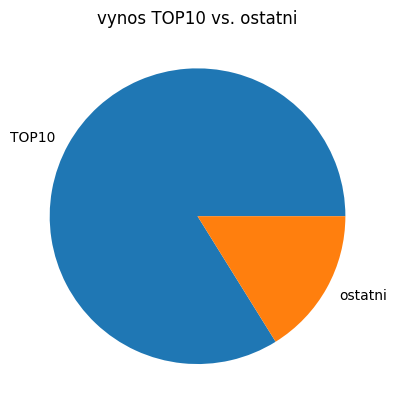

In [32]:
pandas.Series({'TOP10': income_top10,'ostatni':(income_all-income_top10)}).plot.pie(title='vynos TOP10 vs. ostatni')